In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
df_copy = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
cmap = sns.diverging_palette(20, 500, s = 90, l = 80, as_cmap=True)
palette = sns.diverging_palette(20, 500, s = 100, l = 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


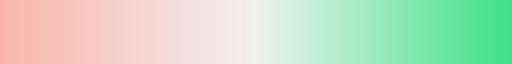

In [7]:
cmap

In [8]:
df.sample(50).style.background_gradient(cmap = cmap)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
138,7.800000,0.560000,0.190000,2.100000,0.081000,15.000000,105.000000,0.996200,3.330000,0.540000,9.500000,5
515,8.500000,0.655000,0.490000,6.100000,0.122000,34.000000,151.000000,1.001000,3.310000,1.140000,9.300000,5
298,7.200000,0.650000,0.020000,2.300000,0.094000,5.000000,31.000000,0.999300,3.670000,0.800000,9.700000,5
763,9.300000,0.655000,0.260000,2.000000,0.096000,5.000000,35.000000,0.997380,3.250000,0.420000,9.600000,5
1140,7.300000,0.400000,0.300000,1.700000,0.080000,33.000000,79.000000,0.996900,3.410000,0.650000,9.500000,6
683,8.100000,0.780000,0.230000,2.600000,0.059000,5.000000,15.000000,0.997000,3.370000,0.560000,11.300000,5
995,7.700000,0.600000,0.060000,2.000000,0.079000,19.000000,41.000000,0.996970,3.390000,0.620000,10.100000,6
872,7.300000,0.350000,0.240000,2.000000,0.067000,28.000000,48.000000,0.995760,3.430000,0.540000,10.000000,4
746,8.200000,0.340000,0.380000,2.500000,0.080000,12.000000,57.000000,0.997800,3.300000,0.470000,9.000000,6
195,7.800000,0.590000,0.330000,2.000000,0.074000,24.000000,120.000000,0.996800,3.250000,0.540000,9.400000,5


In [9]:
df.head(50).style.highlight_min(color = "pink")\
        .highlight_max(color = "lightblue")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [10]:
df.corr().style.background_gradient(cmap=cmap)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

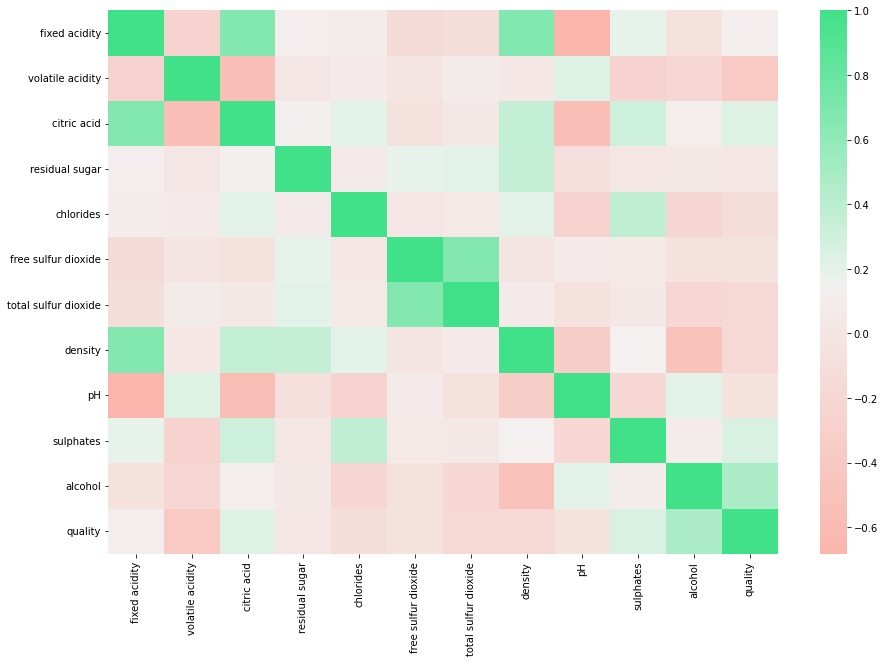

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap=cmap)

In [12]:
df['density_norm'] = df.density.apply(lambda x:(x - min(df.density))/(max(df.density)-min(df.density)))

In [13]:
df['sugar_norm'] = df['residual sugar'].apply(lambda x:(x - min(df['residual sugar']))/(max(df['residual sugar'])-min(df['residual sugar'])))

In [14]:
sns.set_palette(sns.diverging_palette(20, 500, s = 100, l = 60))
sns.set_style('dark')

In [15]:
df.pivot_table(
    index=['quality'],
    values=['density_norm', 'alcohol','free sulfur dioxide','sugar_norm', 'volatile acidity'],
    columns=[],
    aggfunc=['mean']
).style.background_gradient(cmap = cmap)

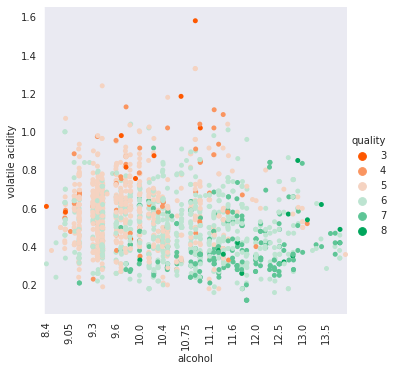

In [16]:
g = sns.catplot(data = df, x= 'alcohol', y= 'volatile acidity', hue='quality')
g.set_xticklabels(step=5,rotation=90) 

In [17]:
features = ['density', 'alcohol','free sulfur dioxide','residual sugar', 'volatile acidity','pH','quality']

In [18]:
palette=sns.diverging_palette(20, 500, s = 100, l = 60)

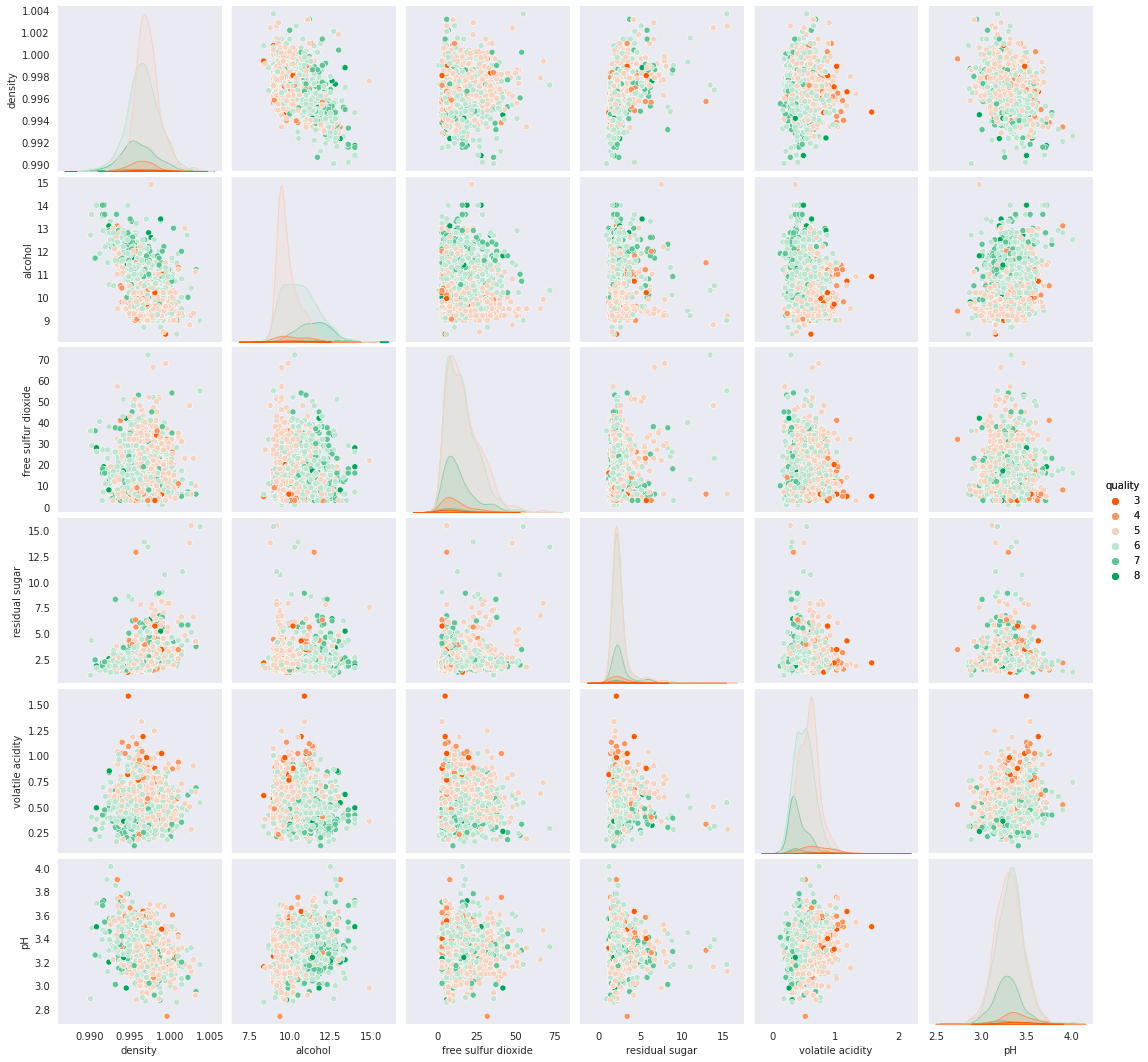

In [19]:
g = sns.pairplot(df_copy[features], hue='quality',palette=palette)
g.add_legend()

In [20]:
#np.where([df_copy.quality <= 5,df_copy.quality <= 7, df_copy.quality < 7 ],df_copy.quality, ['malo','medio', 'bueno'])

In [21]:
df_copy.quality.where(df_copy.quality > 5, 'mala').where(df_copy.quality > 7, 'media').where(df_copy.quality < 7, 'bueno').value_counts()

media    1382
bueno     217
Name: quality, dtype: int64

In [22]:
def trans(x:int):
    x = int(x)
    if x<=4:
        return 'baja'
    elif x<7 and x>=5:
        return 'media'
    else:
        return 'alta'

In [23]:
trans(6)

'media'

In [24]:
df_copy.quality.apply(trans).value_counts()

media    1319
alta      217
baja       63
Name: quality, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
df_minmax = pd.DataFrame(scaler.fit_transform(df_copy.loc[:,df_copy.columns != 'quality']))

In [28]:
df_minmax['quality'] = df_copy['quality']

In [29]:
df_minmax.columns = df_copy.columns

In [30]:
df_minmax

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


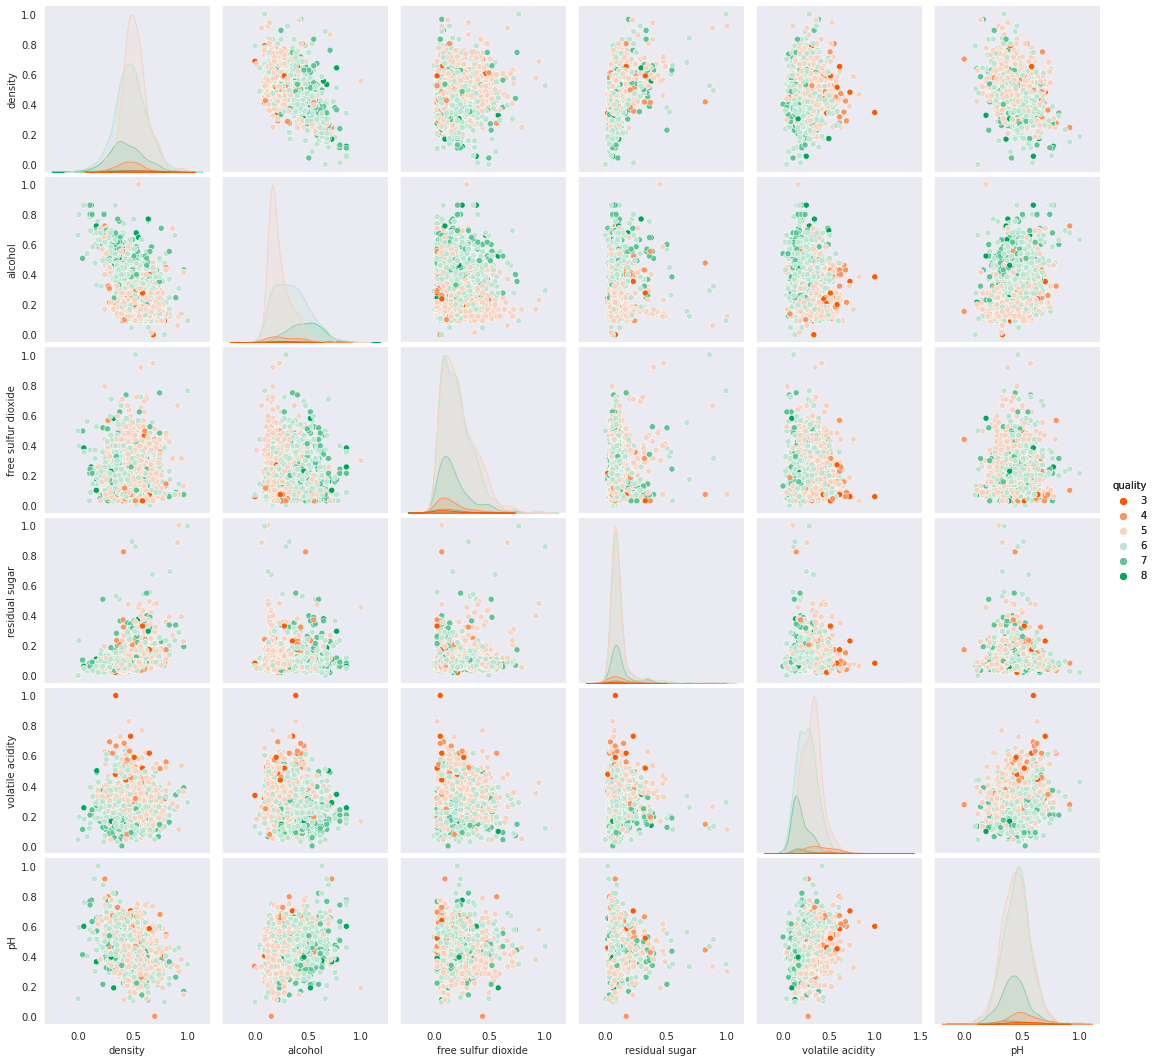

In [31]:
g = sns.pairplot(df_minmax[features], hue='quality',palette=palette)
g.add_legend()